Kaggle dataset Churn Modelling for predicting wether the customer would retain or not depending on features including location,credit score, 

In [60]:
import pandas as pd
import numpy as np


In [61]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [62]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [63]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [64]:
import seaborn as sns

In [65]:
import tensorflow as tf
tf.__version__

'2.9.2'

In [66]:
df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


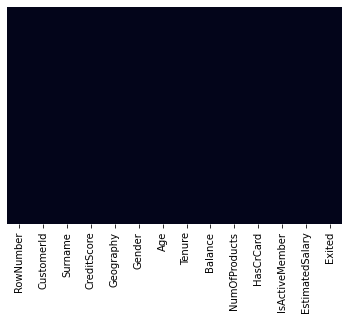

In [67]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [68]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [69]:
x=df.iloc[:,3:13]
y=df.iloc[:,13]

In [70]:
x.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [71]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [72]:
x.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000


In [73]:
x.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


Data has no missing values, also no two independent features are highly correlated. 

Encoding Categorical Variables

In [74]:
x['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [75]:
print(x)

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
0           

In [76]:
x.iloc[:,2]

0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
9995      Male
9996      Male
9997    Female
9998      Male
9999    Female
Name: Gender, Length: 10000, dtype: object

Encoding Female column

In [77]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x.iloc[:,2]=le.fit_transform(x.iloc[:,2])

1 stands for male, 0 for female

In [78]:
type(x)

pandas.core.frame.DataFrame

In [79]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10


In [80]:
x['Gender'].value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

In [81]:
print(x)

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France       0   42       2       0.00              1   
1             608     Spain       0   41       1   83807.86              1   
2             502    France       0   42       8  159660.80              3   
3             699    France       0   39       1       0.00              2   
4             850     Spain       0   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France       1   39       5       0.00              2   
9996          516    France       1   35      10   57369.61              1   
9997          709    France       0   36       7       0.00              1   
9998          772   Germany       1   42       3   75075.31              2   
9999          792    France       0   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
0           

Performing One hot encoding for categorizing Geography column

In [82]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [83]:
print(x)

[[1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]


In [84]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [85]:
type(x_train)

numpy.ndarray

In [86]:
type(y_train)

pandas.core.series.Series

Feature Scaling - standardizing the independent features such that Feature Scaling Algorithms will scale in a fixed range say [-1, 1] or [0, 1]. And then no feature can dominate others

In [87]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [88]:
print(x_train)

[[-1.01460667 -0.5698444   1.74309049 ...  0.64259497 -1.03227043
   1.10643166]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497  0.9687384
  -0.74866447]
 [ 0.98560362 -0.5698444  -0.57369368 ...  0.64259497 -1.03227043
   1.48533467]
 ...
 [ 0.98560362 -0.5698444  -0.57369368 ...  0.64259497 -1.03227043
   1.41231994]
 [-1.01460667 -0.5698444   1.74309049 ...  0.64259497  0.9687384
   0.84432121]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497 -1.03227043
   0.32472465]]


In [89]:
print(x_test)

[[-1.01460667  1.75486502 -0.57369368 ...  0.64259497  0.9687384
   1.61085707]
 [ 0.98560362 -0.5698444  -0.57369368 ...  0.64259497 -1.03227043
   0.49587037]
 [-1.01460667 -0.5698444   1.74309049 ...  0.64259497  0.9687384
  -0.42478674]
 ...
 [-1.01460667 -0.5698444   1.74309049 ...  0.64259497 -1.03227043
   0.71888467]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497  0.9687384
  -1.54507805]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497 -1.03227043
   1.61255917]]


Building ANN using keras

In [90]:
ann = tf.keras.models.Sequential()

Calling Sequential Layer from keras, tensorflow module 
Sequential layer is making hidden(more than one), input and output layers connected in a sequence via Synapses.

In [91]:
#Adding first hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation = 'relu'))


In [92]:
#Adding three more hidden layers
ann.add(tf.keras.layers.Dense(units=6,activation = 'relu'))
ann.add(tf.keras.layers.Dense(units=6,activation = 'relu'))
ann.add(tf.keras.layers.Dense(units=6,activation = 'relu'))

#Now total we have 4 hidden layers of weight

In [93]:
# Adding output layer
# For binary classification we are using sigmoid, for non binary classification we would have use softmax
ann.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))

Training ANN

In [94]:
#compiling ANN
# I have performed Stochastic Gradient Descent such that weights are adjusted by calculating cost funcn after each row
# Adam optimizer is used to perform Stochastic Gradient Descent 
# Loss function for binary classification - 'binary_crossentropy'

ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [95]:
#batch size means in how many batches you want to perform stochastic gradient descent. Batch size is number of samples passed per propogation for testing cost function 
#batch size default chosen 32, epoch default chosen, like hit and trial
ann.fit(x_train,y_train, batch_size = 32,epochs=100 ) 


Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5316 - accuracy: 0.7959
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4623 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4464 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4374 - accuracy: 0.7969
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4321 - accuracy: 0.7989
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.8045
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4219 - accuracy: 0.8177
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4177 - accuracy: 0.8224
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4135 - accuracy: 0.8256
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4100 - accura

Predicting a single value

Model is giving probability of outcome, to predict true or false we have to give a threshold value, default taking it as 0.5

Make 2d array, look for dummy variables that we have changed by label encoder and onehot encoder

Geography: France
Credit Score: 600
Gender: Male
Age: 40 years old
Tenure: 3 years
Balance: $ 60000
Number of Products: 2
Does this customer have a credit card? Yes
Is this customer an Active Member: Yes
Estimated Salary: $ 50000
.
.
.
So, should we say goodbye to that customer?

In [110]:
z=ann.predict(sc.transform([[1,0,0,600,1,40,3,60000,2,1,1,50000]]))>0.5
print(z)

1/1 [==============================] - 0s 19ms/step
[[False]]


True denotes leave the bank, False means wont leave the bank

Predicitng test Results and checking accuracy

In [108]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


In [109]:
#Calculating value counts in array
unique, counts = np.unique(y_pred, return_counts=True)

print(np.asarray((unique, counts)).T)

[[   0 1748]
 [   1  252]]


In [103]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1522   73]
 [ 226  179]]


0.8505